In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import numpy as np
from matplotlib import pyplot as pl

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
#folder = '/kaggle/input/fashion-mnist-itba-lab-2020/'
folder  = 'data/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
#uso un random_State fijo para asegurar repetitividad
#uso 10% del dataset para validacion
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1, stratify=y, random_state=44)

In [5]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)
y_categorical = to_categorical(y)

# Exploro Data

In [6]:
print(y_train)
print(y_train.shape)
print(np.max(y_train),np.min(y_train))
print(y_train_categorical.shape)
print(y_train[0])
print(y_train_categorical[0])
print(y_train[1])
print(y_train_categorical[1])

print(x_train.shape)
print(x_train[0].shape)
print(x_train.shape[1:])

#print(x_train[0])

[3. 0. 7. ... 1. 0. 5.]
(54000,)
9.0 0.0
(54000, 10)
3.0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(54000, 28, 28)
(28, 28)
(28, 28)


Verifico el balanceo del dataset, luego de aplicar el stratify

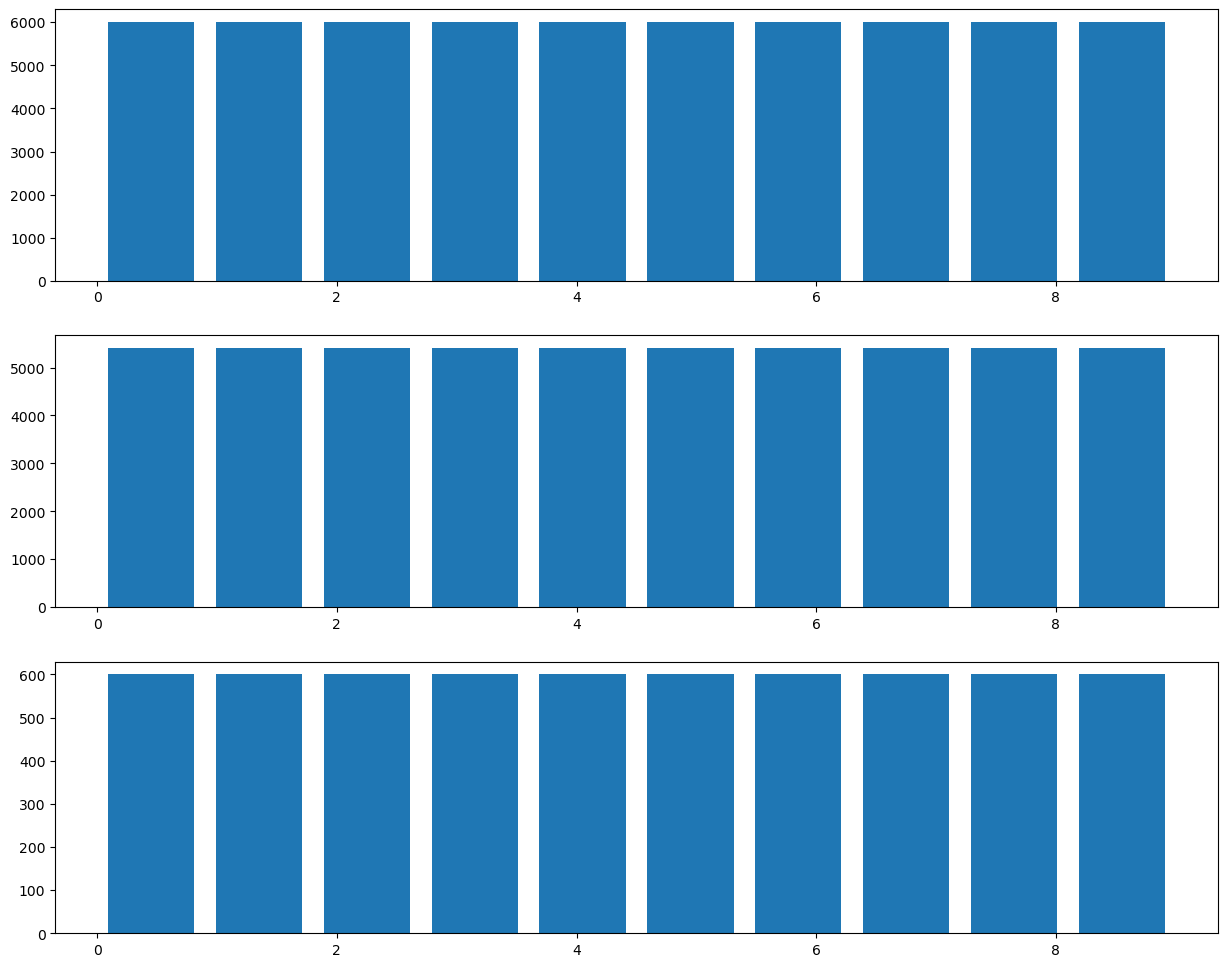

In [7]:
pl.figure(figsize=[15,12])
pl.subplot(3,1,1)
pl.hist(y,rwidth=0.8)
pl.subplot(3,1,2)
pl.hist(y_train,rwidth=0.8)
pl.subplot(3,1,3)
pl.hist(y_valid,rwidth=0.8)
pl.show()


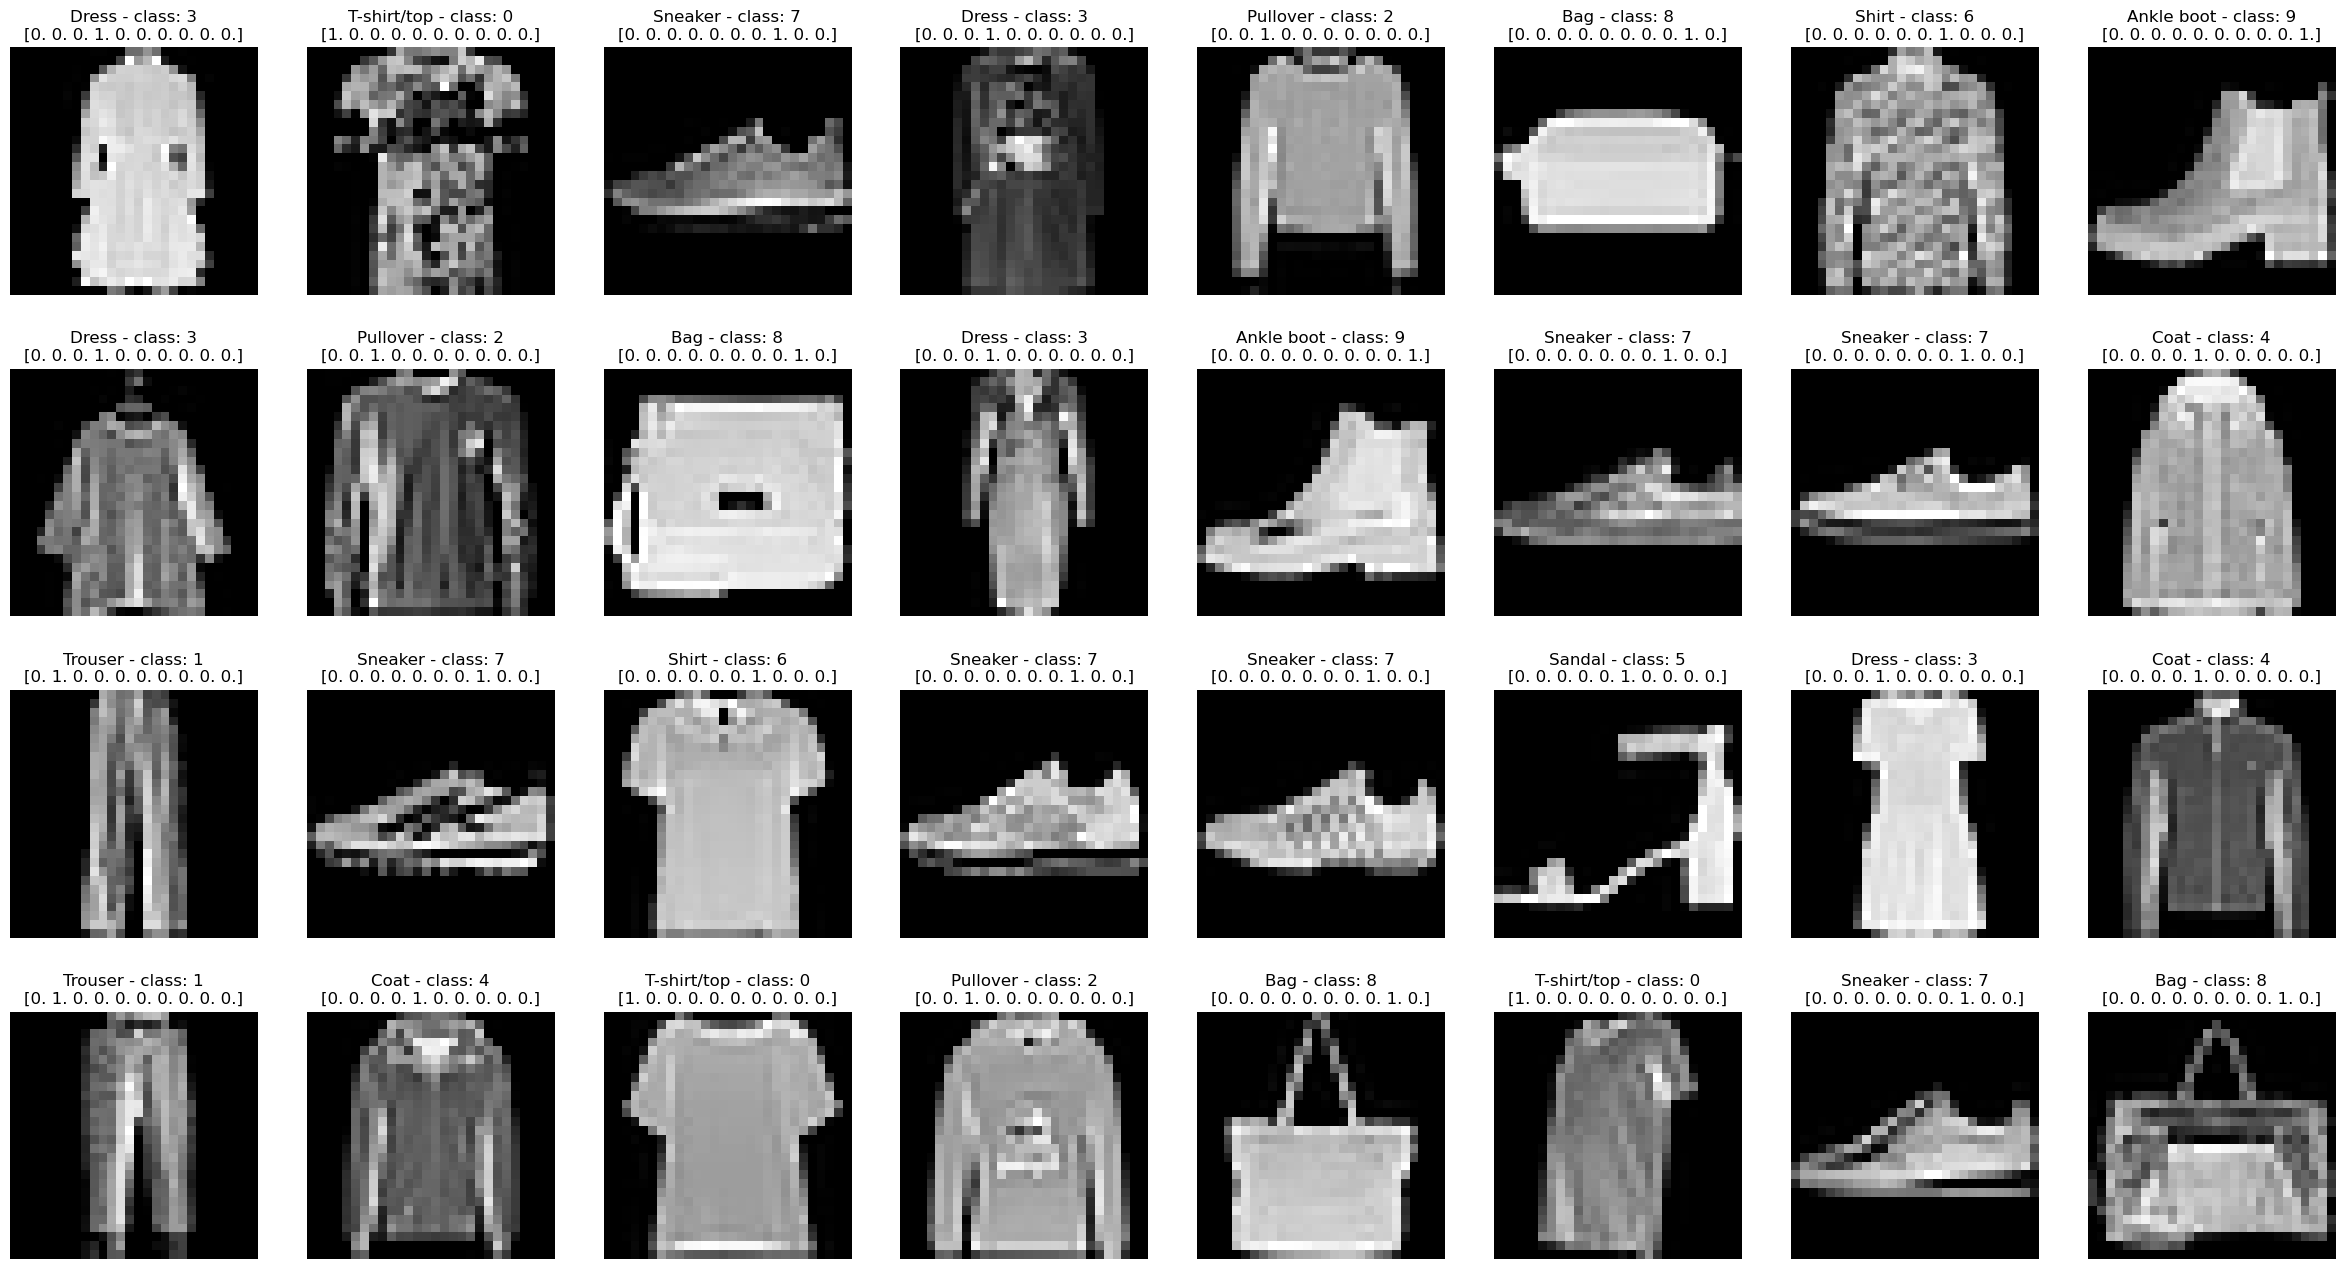

In [8]:
alto = 4
ancho = 8
f, axs = pl.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

# Mejoras

Recomendaciones para mejorar el score:

* Normalizar
* Aumentar la cantidad de capas y neuronas por capa
* Variar optimizadores y learning rates (Adam es una de los más recomendados para estos casos)
* Variar Batch Size (32, 64, 128, 256, 512)
* Probar con distintas funciones de activación (sigmoid, relu, leaky_relu, prelu, etc)
* Utilizar k-fold para entrenar con todo el dataset
* Data augmentation

# 1ra mejora: Normalizo entradas

In [9]:
x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255
x = x / 255

# Armo regresión logística como baseline

In [ ]:
output_size = len(classes) #10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

In [ ]:
lr = 1e-2
SGD = optimizers.SGD(learning_rate=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [ ]:
batch_size = 512
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

In [ ]:
f, (ax1, ax2) = pl.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
pl.show()

## Evaluo en validación

In [ ]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

# Armo primer modelo de DNN

In [ ]:
output_size = len(classes)
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
#model_single_layer.add(InputLayer(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(300, activation = 'relu', name='Oculta1'))
model_single_layer.add(Dense(100, activation = 'relu', name='Oculta2'))
# model_single_layer.add(Dense(30, activation = 'relu', name='Oculta3'))
# model_single_layer.add(Dense(30, activation = 'relu', name='Oculta4'))
model_single_layer.add(Dense(output_size, activation = 'softmax', name='Salida'))
model_single_layer.summary()

In [ ]:
# lr = 0.05
# opt = optimizers.SGD(learning_rate=lr)
# lr = 0.0001
# opt = optimizers.RMSprop(learning_rate=lr)
lr = 0.00001
opt = optimizers.Adam(learning_rate=lr)

model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
batch_size = 256 #32
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

In [ ]:
f, (ax1, ax2) = pl.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
pl.show()

# Adapto modelo para busqueda de hiperparametros

In [17]:
import tensorflow.keras as keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, optimizer='Adam', input_shape=[10], output_size=10):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape, name='Entrada'))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", name=f'Densa{layer+1}'))
    model.add(keras.layers.Dense(output_size, activation = 'softmax', name='Salida'))
    model.summary()
    if optimizer == 'Adam':
        optimizer_f = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer_f = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_f, metrics=['accuracy'])
    return model

##### for testing:
# class_model = build_model(n_hidden=2, n_neurons=200, learning_rate=0.0001, input_shape=x_train.shape[1:], output_size=len(classes))

In [18]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model,
                                                          n_hidden=2,
                                                          n_neurons=250,
                                                          learning_rate=0.0001,
                                                          input_shape=x_train.shape[1:],
                                                          output_size=len(classes))

##### for testing:
# keras_class.fit(x_train,
#                 y_train_categorical,
#                 epochs=50,
#                 batch_size=64, 
#                 verbose=1,
#                 validation_data=(x_valid, y_val_categorical),
#                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)])
# model_single_layer = keras_class.model
# f, (ax1, ax2) = pl.subplots(1, 2, figsize=(20,6))
# ax1.plot(model_single_layer.history.history['loss'], label='train')
# ax1.plot(model_single_layer.history.history['val_loss'], label='val')
# ax1.set_title('Loss - Cross Entropy')
# ax1.legend()
# ax2.plot(model_single_layer.history.history['accuracy'], label='train')
# ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
# ax2.set_title('Metric - Accuracy')
# ax2.legend()
# pl.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_4208\2106591240.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model,


## Random search

Se aplica stratified K-folding con cv=3

In [19]:
%%time

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

###### Iteration params:
param_distribs = {
    "n_hidden": [1, 2],
    "n_neurons": list(range(50, 300)),
    "learning_rate": reciprocal(1e-5, 5e-3),
    'epochs': [30],     
    'batch_size':[64,128,256],
    'optimizer': ['Adam','SGD'],
}

###### some fixed params selected after random search:
param_distribs = {
    "n_hidden": [2],
    "n_neurons": [250],
    "learning_rate": [3e-4],
    'epochs': [30],     
    'batch_size':[128],
    'optimizer': ['Adam'],
}

rnd_search_cv = RandomizedSearchCV(keras_class,
                                   param_distribs,
                                   n_jobs=-1,
                                   verbose=1,
                                   cv=3,
                                   n_iter=1)

rnd_search_cv.fit(x,
                  y_categorical,
                  verbose=1,
                  #validation_data=(x_valid, y_val_categorical),
                  #callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]
                 )

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (Flatten)           (None, 784)               0         
                                                                 
 Densa1 (Dense)              (None, 250)               196250    
                                                                 
 Densa2 (Dense)              (None, 250)               62750     
                                                                 
 Salida (Dense)              (None, 10)                2510      
                                                                 
Total params: 261,510
Trainable params: 261,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.5813 - accuracy: 0.8038
Epoch 2/30
469/469 [=

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C6123AE670>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'batch_size': [128], 'epochs': [30],
                                        'learning_rate': [0.0003],
                                        'n_hidden': [2], 'n_neurons': [250],
                                        'optimizer': ['Adam']},
                   verbose=1)

#### Show results

In [ ]:
# summarize results
print("Best: %f using %s" % (rnd_search_cv.best_score_, rnd_search_cv.best_params_))
means = rnd_search_cv.cv_results_['mean_test_score']
stds = rnd_search_cv.cv_results_['std_test_score']
params = rnd_search_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    #if mean > 0.89:
    print("Acc:%f (%f) with: %r" % (mean, stdev, param))

# get best model
model_single_layer = rnd_search_cv.best_estimator_.model

f, (ax1, ax2) = pl.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
#ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
#ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
pl.show()

## Pruebo grid search

In [ ]:
%%time

from scipy.stats import reciprocal
from sklearn.model_selection import GridSearchCV

###### First iteration:
param_distribs = {
    "n_hidden": [2,3],
    "n_neurons": [200,250,300,350],
    "learning_rate": [1e-4, 2e-4, 3e-4, 4e-4, 5e-4],
    'epochs': [30],     
    'batch_size':[32],
    'optimizer': ['Adam'],
}

rnd_search_cv = GridSearchCV(keras_class,
                                   param_distribs,
                                   n_jobs=-1,
                                   verbose=1,
                                   cv=3)

rnd_search_cv.fit(x,
                  y_categorical,
                  verbose=1)

## Agrego dropout y LR decay

In [ ]:
%%time

import tensorflow.keras as keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, optimizer='Adam', input_shape=[10], output_size=10, dropout_rate = 0.2, weight_constraint = 3.0):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape, name='Entrada'))
    for layer in range(n_hidden):
        if dropout_rate > 0:
            model.add(keras.layers.Dense(n_neurons, activation="relu", name=f'Densa{layer+1}', kernel_constraint=keras.constraints.MaxNorm(weight_constraint)))
            model.add(keras.layers.Dropout(dropout_rate))
        else:
            model.add(keras.layers.Dense(n_neurons, activation="relu", name=f'Densa{layer+1}'))
    model.add(keras.layers.Dense(output_size, activation = 'softmax', name='Salida'))
    model.summary()
    if optimizer == 'Adam':
        optimizer_f = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer_f = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_f, metrics=['accuracy'])
    return model

keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model,
                                                          n_hidden=2,
                                                          n_neurons=250,
                                                          learning_rate=0.0001,
                                                          input_shape=x_train.shape[1:],
                                                          output_size=len(classes))

# ie. for the learning rate to start decaying at 25th epoch, this parameter should be 25 * (num_samples_of_whole_dataset / batch_size)
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 1e-3,
                                                          decay_steps=4000,
                                                          decay_rate=0.9,
                                                          staircase=False)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

###### First iteration:
param_distribs = {
    "n_hidden": [2],
    "n_neurons": [300], #list(range(200, 350)),
    "learning_rate": [lr_schedule], #reciprocal(1e-4, 4e-4),
    'epochs': [30],     
    'batch_size':[256],
    'optimizer': ['Adam'],
    'weight_constraint':[3.0],
    'dropout_rate':[0.1],
}

rnd_search_cv = RandomizedSearchCV(keras_class,
                                   param_distribs,
                                   n_jobs=-1,
                                   verbose=1,
                                   cv=3,
                                   n_iter=1)

rnd_search_cv.fit(x,
                  y_categorical,
                  verbose=1)

#### Show results

In [ ]:
# summarize results
print("Best: %f using %s" % (rnd_search_cv.best_score_, rnd_search_cv.best_params_))
means = rnd_search_cv.cv_results_['mean_test_score']
stds = rnd_search_cv.cv_results_['std_test_score']
params = rnd_search_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    #if mean > 0.89:
    print("Acc:%f (%f) with: %r" % (mean, stdev, param))

# get best model
model_single_layer = rnd_search_cv.best_estimator_.model

f, (ax1, ax2) = pl.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
#ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
#ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
pl.show()

# Solución final

In [98]:
def step_decay(epoch):
    #lr_drop = 0.5
    #epochs_drop = 5.0
    #lrate = initial_lrate * math.pow(lr_drop, math.floor((1+epoch)/epochs_drop))
    
    ### exponential decay
    k=0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    
    #print("epoch:",epoch,"   lrate:",lrate)
    return lrate

import math
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
lrate = LearningRateScheduler(step_decay)
#earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [lrate] #,earlystop]

In [106]:
output_size = len(classes)

epochs = 30
batch_size = 32
kfold_splits = 3

dropout_rate = 0.1
weight_constraint = 3.
    
initial_lrate = 0.001

from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits = kfold_splits, random_state = 7, shuffle = True) 

losses = []
val_losses = []
accuracies = []
val_accuracies = []

for train_index, val_index in skf.split(x,y):
    model_single_layer = Sequential()
    model_single_layer.add(Flatten(input_shape=x.shape[1:]))
    model_single_layer.add(Dense(300, activation = 'relu', name='Oculta1', kernel_constraint=keras.constraints.MaxNorm(weight_constraint)))
    model_single_layer.add(Dropout(dropout_rate))
    model_single_layer.add(Dense(300, activation = 'relu', name='Oculta2', kernel_constraint=keras.constraints.MaxNorm(weight_constraint)))
    model_single_layer.add(Dropout(dropout_rate))
    model_single_layer.add(Dense(output_size, activation = 'softmax', name='Salida'))
    model_single_layer.summary()

    opt = optimizers.Adam(learning_rate=initial_lrate)
    model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    x_train_kf, x_val_kf = x[train_index], x[val_index]
    y_cat_train_kf, y_cat_val_kf = y_categorical[train_index], y_categorical[val_index]

    model_single_layer.fit(x_train_kf, 
                           y_cat_train_kf,
                           epochs=epochs, 
                           batch_size=batch_size, 
                           verbose=1, 
                           validation_data = (x_val_kf, y_cat_val_kf),
                           callbacks=callbacks_list
                          )
    

    losses.append(model_single_layer.history.history['loss'])
    val_losses.append(model_single_layer.history.history['val_loss'])
    accuracies.append(model_single_layer.history.history['accuracy'])
    val_accuracies.append(model_single_layer.history.history['val_accuracy'])


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_62 (Flatten)        (None, 784)               0         
                                                                 
 Oculta1 (Dense)             (None, 300)               235500    
                                                                 
 dropout_124 (Dropout)       (None, 300)               0         
                                                                 
 Oculta2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_125 (Dropout)       (None, 300)               0         
                                                                 
 Salida (Dense)              (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-t

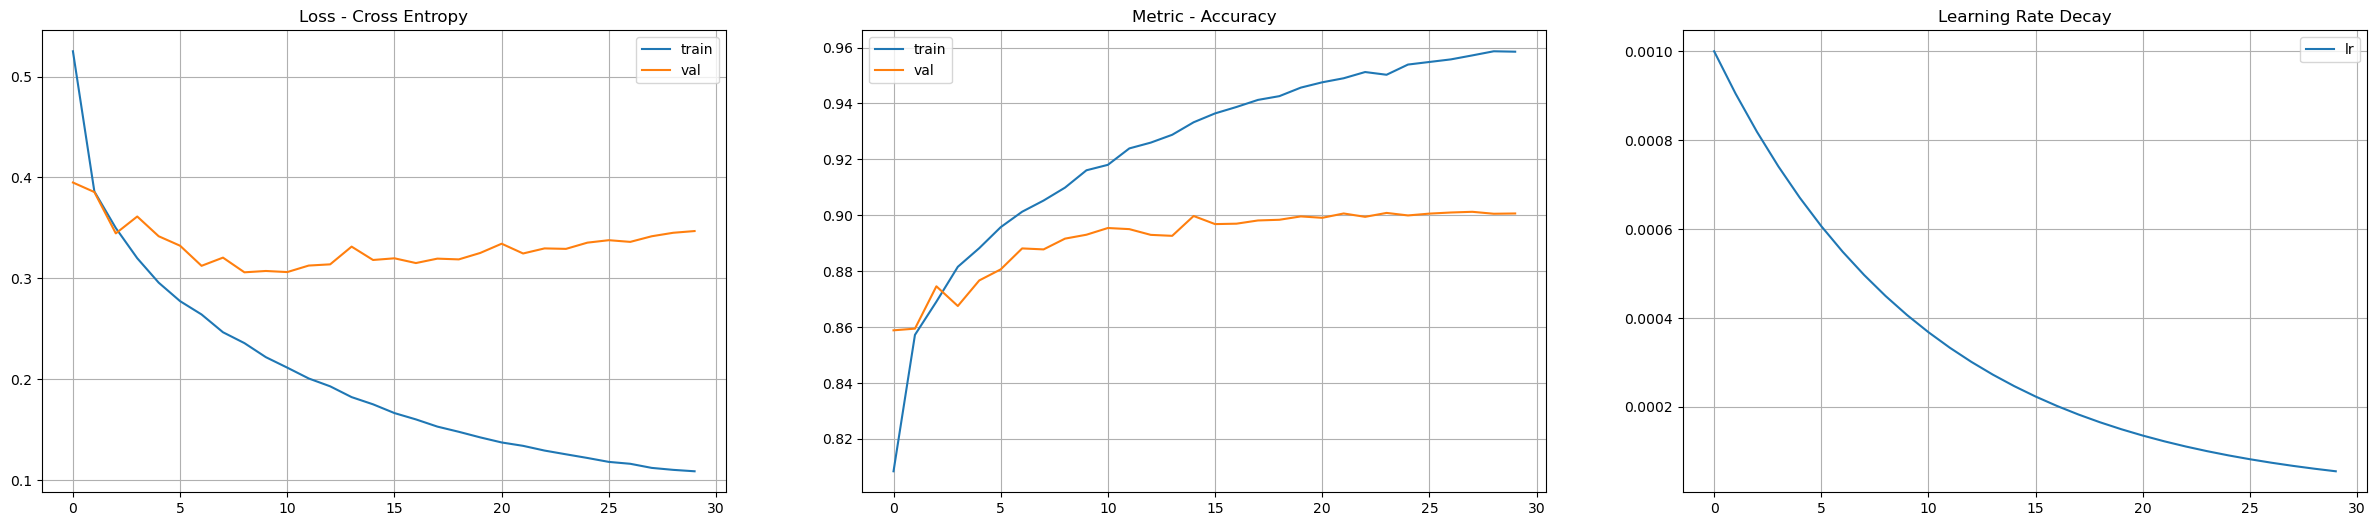

Train accuracy: 0.9580000042915344
Validation accuracy: 0.9022333224614462


In [107]:
f, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(30,6))
ax1.plot(losses[-1], label='train')
ax1.plot(val_losses[-1], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax1.grid(True)
ax2.plot(accuracies[-1], label='train')
ax2.plot(val_accuracies[-1], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
ax2.grid(True)
ax3.plot(model_single_layer.history.history['lr'], label='lr')
ax3.set_title('Learning Rate Decay')
ax3.legend()
ax3.grid(True)
pl.show()

print("Train accuracy:",np.mean([accuracies[x][-1] for x in range(kfold_splits)]))
print("Validation accuracy:",np.mean([val_accuracies[x][-1] for x in range(kfold_splits)]))

## Evaluo en validación

In [108]:
#loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
#print(acc, loss)

## Predicciones en test

In [109]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [110]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 0 7]


# Armo CSV para submitear

In [111]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')

# Matriz de confusión

1688/1688 [==============================] - 3s 2ms/step
[[4873    2   55   82    5    1  373    0    9    0]
 [   4 5353    3   32    6    0    2    0    0    0]
 [  45    3 4789   33  328    0  198    0    4    0]
 [  39    9   16 5202  103    0   30    0    1    0]
 [   2    1  327  128 4795    0  142    0    5    0]
 [   0    0    0    1    0 5341    1   33    3   21]
 [ 362    2  276   91  266    0 4388    0   15    0]
 [   0    0    0    0    0   30    0 5294    0   76]
 [   6    0    7   13    8    5   13    1 5346    1]
 [   0    0    0    1    0   12    0   77    0 5310]]
188/188 [==============================] - 0s 2ms/step
[[532   0   6  15   1   0  45   0   1   0]
 [  0 592   0   7   1   0   0   0   0   0]
 [  5   0 527   8  43   0  15   0   1   1]
 [  5   0   2 572  12   0   8   0   1   0]
 [  0   0  29  21 537   0  13   0   0   0]
 [  0   0   0   0   0 592   0   3   0   5]
 [ 35   0  34  10  30   0 490   0   1   0]
 [  0   0   0   0   0   3   0 585   2  10]
 [  1   1   1

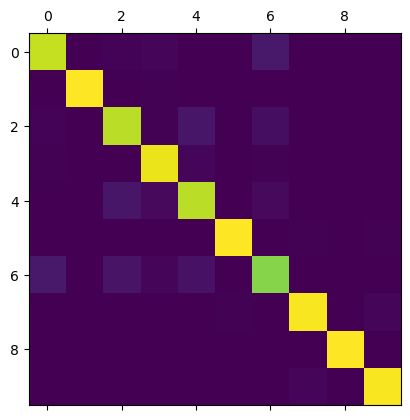

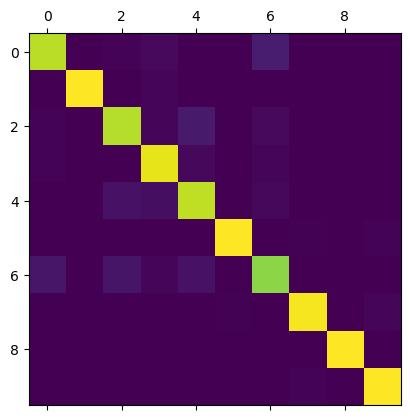

In [104]:
from sklearn.metrics import confusion_matrix

y_train_pred = model_single_layer.predict(x_train)
y_train_pred_labels = np.argmax(y_train_pred, axis = 1)

train_conf_mx = confusion_matrix(y_train, y_train_pred_labels)
print(train_conf_mx)

pl.matshow(train_conf_mx)#, cmap=pl.cm.gray)

y_valid_pred = model_single_layer.predict(x_valid)
y_valid_pred_labels = np.argmax(y_valid_pred, axis = 1)

valid_conf_mx = confusion_matrix(y_valid, y_valid_pred_labels)
print(valid_conf_mx)

pl.matshow(valid_conf_mx)#, cmap=pl.cm.gray)
pl.show()

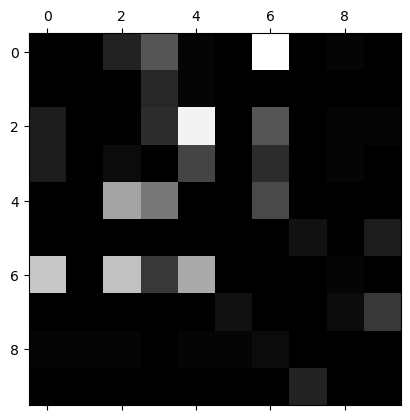

In [105]:
row_sums = valid_conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = valid_conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
pl.matshow(norm_conf_mx, cmap=pl.cm.gray)
pl.show()